# Analysis
Now let's delve deeper into the analysis!

## Load DataFrames

In [1]:
# import things
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# reading in files
fb_congress_df = pd.read_pickle("pickle/fb_congress_df_part1.pkl")
fb_congress_df2 = pd.read_pickle("pickle/fb_congress_df_part2.pkl")

# merging them
fb_congress_df = fb_congress_df.append(fb_congress_df2)

In [3]:
# read in fb wiki
fb_wiki_df = pd.read_pickle("pickle/fb_wiki_df.pkl")

In [4]:
# read in fitocracy
fitocracy_df = pd.read_pickle("pickle/fitocracy_df.pkl")

In [5]:
# read in reddit
reddit_df = pd.read_pickle("pickle/reddit_df.pkl")

In [6]:
# read in ted
ted_responses_df = pd.read_pickle("pickle/ted_responses_df.pkl")

## Conduct basic analysis
Some of this information will be repetition from previous files, but I want to have it all in one place here.

### Analysis of Facebook Congress

In [7]:
fb_congress_df.head()

,post_id,post_type,op_id,op_name,op_category,op_gender,responder_id,post_text,response_text
0,0,video,57265377,Roger Williams,Congress_Republican,M,Jerry,"Yesterday, my colleagues and I voted to protec...",Protecting birth is not the same as protecting...
1,0,video,57265377,Roger Williams,Congress_Republican,M,Andrea,"Yesterday, my colleagues and I voted to protec...",You need to protect children and leave my body...
2,0,video,57265377,Roger Williams,Congress_Republican,M,Sherry,"Yesterday, my colleagues and I voted to protec...",Thank you
3,0,video,57265377,Roger Williams,Congress_Republican,M,Bob,"Yesterday, my colleagues and I voted to protec...",Thank you Roger
4,0,video,57265377,Roger Williams,Congress_Republican,M,Joy,"Yesterday, my colleagues and I voted to protec...",Unwanted pregnancy is a sad and unfortunate si...


In [8]:
unique_posts = fb_congress_df.drop_duplicates('post_id')

# different post types, make sure unique for post id
unique_posts.post_type.value_counts()

link      210499
photo     199123
status     87921
video      46842
event       3417
music        278
note         261
Name: post_type, dtype: int64

In [9]:
# different op categories, make sure unique for post id
unique_posts.op_category.value_counts()

Congress_Republican     239909
Congress_Democratic     158237
                        149304
Congress_Independent       891
Name: op_category, dtype: int64

Note: the ones with no category are the ones with no response corresponding to that post.

In [10]:
# different op genders, make sure unique for post id
unique_posts.op_gender.value_counts()

M    413011
W    135330
Name: op_gender, dtype: int64

In [11]:
# average num responses for everyone
fb_congress_df.post_id.value_counts().mean()

25.560392164729613

In [12]:
# average number of responses per gender

print('average responses when poster is male:', fb_congress_df.groupby('op_gender').post_id.value_counts()['M'].mean())
print('average responses when poster is female:', fb_congress_df.groupby('op_gender').post_id.value_counts()['W'].mean())

average responses when poster is male: 25.473808203655594
average responses when poster is female: 25.824636074780166


### Analysis of Facebook Wiki

In [13]:
fb_wiki_df.head()

,post_id,post_type,op_id,op_name,op_category,op_gender,responder_id,post_text,response_text
0,0,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Michelle,Tornado watch in effect tonight. Be safe. Plea...,Is this watch going to make it to LaPorte county?
1,0,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Melissa,Tornado watch in effect tonight. Be safe. Plea...,Anything for Wilmington area
2,0,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Darlene,Tornado watch in effect tonight. Be safe. Plea...,"Thanks, please keep us posted."
3,0,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Cheryl,Tornado watch in effect tonight. Be safe. Plea...,Thanks Byron
4,0,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Melissa,Tornado watch in effect tonight. Be safe. Plea...,[[STICKER]]


In [14]:
unique_posts = fb_wiki_df.drop_duplicates('post_id')

# different post types, make sure unique for post id
unique_posts.post_type.value_counts()

photo     61411
link      37609
status    33495
video     16026
event       859
note         32
music        16
Name: post_type, dtype: int64

In [15]:
# different op categories, make sure unique for post id
unique_posts.op_category.value_counts()

                                                                   31637
Wikipedia_American_television_actresses                            22822
Wikipedia_American_television_news_anchors                         17925
Wikipedia_American_television_talk_show_hosts                      16607
Wikipedia_American_female_tennis_players                           14855
Wikipedia_American_film_actresses                                  14579
Wikipedia_American_male_film_actors                                12304
Wikipedia_American_television_journalists                          10285
Wikipedia_American_male_television_actors                           3330
Wikipedia_Women_economists                                          2945
Wikipedia_American_male_tennis_players                               957
Wikipedia_21st-century_American_novelists                            792
Wikipedia_Political_analysts                                         338
Wikipedia_Olympic_track_and_field_athletes_of_the_U

In [16]:
# different op genders, make sure unique for post id
unique_posts.op_gender.value_counts()

W    99692
M    49756
Name: op_gender, dtype: int64

In [17]:
# average num responses for everyone
fb_wiki_df.post_id.value_counts().mean()

71.5910350088325

In [18]:
# average number of responses per gender

print('average responses when poster is male:', fb_wiki_df.groupby('op_gender').post_id.value_counts()['M'].mean())
print('average responses when poster is female:', fb_wiki_df.groupby('op_gender').post_id.value_counts()['W'].mean())

average responses when poster is male: 71.25723530830453
average responses when poster is female: 71.75763351121454


### Analysis of Fitocracy

In [19]:
fitocracy_df.head()

,post_id,op_id,op_gender,responder_id,responder_gender,post_text,response_text
0,0,102,W,1196122,M,Thanks for the follow! I followed back :) I ...,One day at a time! =]
1,1,104,W,5867,W,I've decided I have this crazy goal of running...,Crazy is synonymous with awesome in this case.
2,2,104,W,1635,M,"Umm, yeah, so those are assisted pull-ups. Bef...",You can enter assisted pullups. Select pullups...
3,3,117,M,8520,W,dam gurl lookin mad tone in dat pp holla bb,"Mirin 3% bodyfat? Yeah, you are."
4,4,117,M,29126,M,What's up there bear mode?,"Hey! I just started a new job, so things are s..."


In [20]:
# make sure post id is unique again
print(fitocracy_df.post_id.nunique())
print(len(fitocracy_df.post_id))

318535
318535


In [21]:
# different op genders
fitocracy_df.op_gender.value_counts()

M    173738
W    144797
Name: op_gender, dtype: int64

In [22]:
# different responder genders
fitocracy_df.responder_gender.value_counts()

W    163315
M    155220
Name: responder_gender, dtype: int64

In [23]:
# can't do average number responses per gender - there is only one response per post

# instead, look at how many males respond to males vs. females and how many females respond to males vs. females
fitocracy_df.groupby('op_gender').responder_gender.value_counts()

op_gender  responder_gender
M          W                   94375
           M                   79363
W          M                   75857
           W                   68940
Name: responder_gender, dtype: int64

### Analysis of Reddit

In [24]:
reddit_df.head()

,post_id,subreddit,op_id,op_gender,op_gender_visible,responder_id,responder_gender,responder_gender_visible,post_text,response_text
0,0,2007scape,Kastoli,M,False,Thunda_Storm,,unknown_gender,slayer task perhaps?,or low level. I mean hes wearing black armour ...
1,1,2007scape,Kastoli,M,False,Thunda_Storm,,unknown_gender,"Black DHide legs, possibly an initiate pure?",So... Low level
2,2,2007scape,DCBizzle,M,False,minixmatt,,unknown_gender,Whats a tonk? lol,"<link> TONK, TONK"
3,3,2007scape,ordona,M,False,Namiweso,,unknown_gender,Do the Stronghold of Security for a free 10k t...,Thanks I forgot about that place! :)
4,4,2007scape,SlayerMaster,M,False,Quantization,,unknown_gender,I cant tell if this guy just doesnt speak Engl...,Or hes just trolling.


In [25]:
# make sure post id is unique again
print(reddit_df.post_id.nunique())
print(len(reddit_df.post_id))

1453512
1453512


In [26]:
# different subreddits
reddit_df.subreddit.value_counts()

AskReddit               344400
AskMen                  133920
politics                 46727
funny                    44761
pics                     42920
relationships            34809
AdviceAnimals            33965
worldnews                33571
todayilearned            32652
nba                      32242
gaming                   27855
news                     27225
nfl                      27194
videos                   26940
WTF                      26682
soccer                   22315
leagueoflegends          22151
CasualConversation       21517
movies                   20567
OkCupid                  18239
CFB                      16025
anime                    15254
europe                   15233
hockey                   14949
Fitness                  14909
teenagers                12809
pcmasterrace             11841
explainlikeimfive        11270
SquaredCircle            11249
technology               11244
                         ...  
xboxone                   2932
heroesof

In [27]:
# different op genders
reddit_df.op_gender.value_counts()

M    1148591
W     304921
Name: op_gender, dtype: int64

In [28]:
# different responder genders
reddit_df.responder_gender.value_counts()
# blank is unknown

     1320290
M     102530
W      30692
Name: responder_gender, dtype: int64

In [29]:
# look at how many males respond to males vs. females and how many females respond to males vs. females
reddit_df.groupby('op_gender').responder_gender.value_counts()

op_gender  responder_gender
M                              1045003
           M                     80705
           W                     22883
W                               275287
           M                     21825
           W                      7809
Name: responder_gender, dtype: int64

Let's look at male vs. female posters by subreddit and see if we can find any patterns. It was my assumption that maybe there was so much more male posters and responders was because of the prominent AskMen subreddit.

In [30]:
# copying in from another file, but I thought it was important to look at again
subgroups = reddit_df.groupby('subreddit').op_gender.value_counts()
subgroups_df = subgroups.unstack()
subgroups_df.head()

op_gender,M,W
subreddit,,
2007scape,886.0,42.0
AdviceAnimals,25525.0,8440.0
Amd,860.0,19.0
AskMen,110542.0,23378.0
AskOuija,98.0,19.0


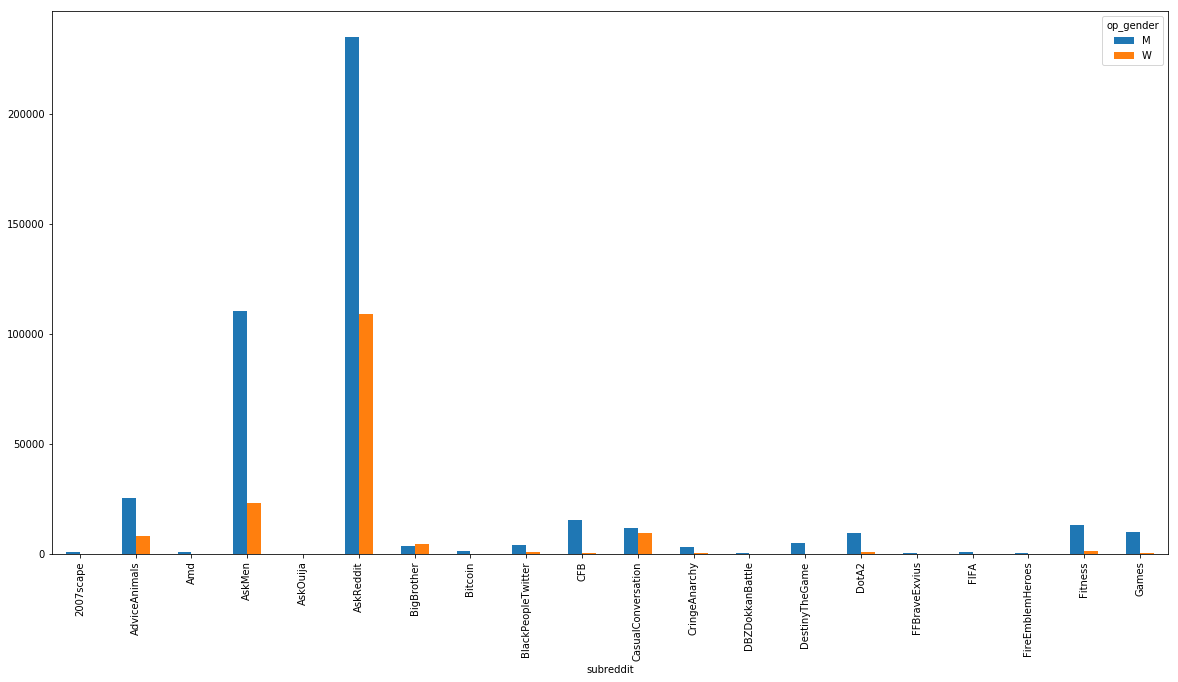

In [31]:
# graph the first 20 subreddits to get some idea
subgroups_df[:20].plot(kind='bar', figsize=(20,10))
plt.show()

So just looking at a flash of the data, 'AskMen' doesn't seem to stand out as a much higher male:female ratio. It seems like most have more male. Maybe Reddit is just a male-dominated site.

Are there any groups where there are more women? From the graph, it looks like the subreddit "BigBrother" has more female posters. Let's see what else...

In [32]:
subgroups_df[subgroups_df.W > subgroups_df.M]

op_gender,M,W
subreddit,,
BigBrother,3564.0,4647.0
aww,4400.0,4597.0
counting,267.0,531.0
relationships,10951.0,23858.0
rupaulsdragrace,153.0,728.0


So with all these subreddits - there are only 5 that have more female than male posters!

### Analysis of TED

In [33]:
ted_responses_df.head()

,post_id,op_id,op_gender,responder_id,response_text
0,0,Aimee Mullins,W,Laura,"She seems like a truly amazing person, regardl..."
1,1,Aimee Mullins,W,Ellen,"Aimee's true ""disability"" is when people treat..."
2,2,Aimee Mullins,W,Tanya,I love that she took away some of the mystery ...
3,3,Aimee Mullins,W,Salim,VERY inspiring indeed! I love these TED antiqu...
4,4,Aimee Mullins,W,Kiruba,We take running so much for granted that most ...


In [34]:
# different op genders
ted_responses_df.op_gender.value_counts()

M    144336
W     46011
Name: op_gender, dtype: int64

Not much else to analyze here...

## Conduct linguistic analysis
Next, we'll look at the actual text. Let's start by conducting some simple linguistic analysis, like token count, sentence length, and TTR.

### Facebook Congress linguistic analysis

In [35]:
# making a smaller sample to do analysis on since it's way too big
# how big again?
fb_congress_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14015811 entries, 0 to 14015810
Data columns (total 9 columns):
post_id          int64
post_type        object
op_id            int64
op_name          object
op_category      object
op_gender        object
responder_id     object
post_text        object
response_text    object
dtypes: int64(2), object(7)
memory usage: 1.0+ GB


In [36]:
fb_congress_df.op_category.value_counts()

Congress_Republican     8886650
Congress_Democratic     4786769
Congress_Independent     193088
                         149304
Name: op_category, dtype: int64

In [37]:
# so there are 14M entries. That's a TON to tokenize. Let's take a sample of 50,000
# should I do a stratified sample?
fb_congress_sample = fb_congress_df.sample(50000)
fb_congress_sample.sort_index(inplace=True)
fb_congress_sample.head()

,post_id,post_type,op_id,op_name,op_category,op_gender,responder_id,post_text,response_text
209,5,photo,57265377,Roger Williams,Congress_Republican,M,Ed,"After a phenomenal season, Jason Garrett has b...",great coach congrats
647,19,video,57265377,Roger Williams,Congress_Republican,M,Michele,"Since its inception, Obamacare has been an abs...",I don't agree. Please stop using the language...
1515,42,photo,57265377,Roger Williams,Congress_Republican,M,Ron,These are my foremost conservative principles....,Can't disagree on your list. I am waiting to s...
1604,46,photo,57265377,Roger Williams,Congress_Republican,M,Dennis,"Today, I humbly ask for your vote. #ElectionDa...",No
1956,55,photo,57265377,Roger Williams,Congress_Republican,M,Don,,N E V E R !!!!!!###!!!!!!##'!'''


In [38]:
# make sure we still have all post types, op categories, and op genders
print(fb_congress_sample.post_type.value_counts())
print(fb_congress_sample.op_category.value_counts())
print(fb_congress_sample.op_gender.value_counts())

link      16963
photo     14589
status     9595
video      8761
event        72
note         16
music         4
Name: post_type, dtype: int64
Congress_Republican     31764
Congress_Democratic     17032
Congress_Independent      665
                          539
Name: op_category, dtype: int64
M    37483
W    12517
Name: op_gender, dtype: int64


In [39]:
# use nltk's tokenizer
import nltk

fb_congress_sample['post_tokens'] = fb_congress_sample.post_text.map(nltk.word_tokenize)
fb_congress_sample['response_tokens'] = fb_congress_sample.response_text.map(nltk.word_tokenize)

In [40]:
# find text length
fb_congress_sample['post_length'] = fb_congress_sample.post_tokens.map(len)
fb_congress_sample['response_length'] = fb_congress_sample.response_tokens.map(len)

fb_congress_sample.head()

,post_id,post_type,op_id,op_name,op_category,op_gender,responder_id,post_text,response_text,post_tokens,response_tokens,post_length,response_length
209,5,photo,57265377,Roger Williams,Congress_Republican,M,Ed,"After a phenomenal season, Jason Garrett has b...",great coach congrats,"[After, a, phenomenal, season, ,, Jason, Garre...","[great, coach, congrats]",18,3
647,19,video,57265377,Roger Williams,Congress_Republican,M,Michele,"Since its inception, Obamacare has been an abs...",I don't agree. Please stop using the language...,"[Since, its, inception, ,, Obamacare, has, bee...","[I, do, n't, agree, ., Please, stop, using, th...",28,181
1515,42,photo,57265377,Roger Williams,Congress_Republican,M,Ron,These are my foremost conservative principles....,Can't disagree on your list. I am waiting to s...,"[These, are, my, foremost, conservative, princ...","[Ca, n't, disagree, on, your, list, ., I, am, ...",11,26
1604,46,photo,57265377,Roger Williams,Congress_Republican,M,Dennis,"Today, I humbly ask for your vote. #ElectionDa...",No,"[Today, ,, I, humbly, ask, for, your, vote, .,...",[No],11,1
1956,55,photo,57265377,Roger Williams,Congress_Republican,M,Don,,N E V E R !!!!!!###!!!!!!##'!''',[],"[N, E, V, E, R, !, !, !, !, !, !, #, #, #, !, ...",0,26


Let's look at length in a boxplot grouping by gender!

average post length when poster is male: 58.86988768241603
average post length when poster is female: 76.01102500599185


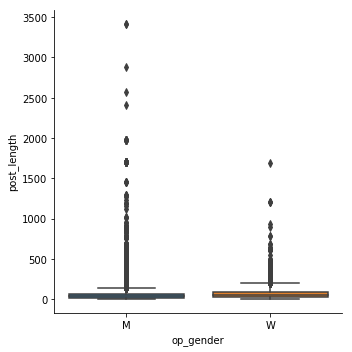

In [41]:
sns.catplot(x='op_gender', y='post_length', kind='box', data=fb_congress_sample)
print('average post length when poster is male:',
      fb_congress_sample[fb_congress_sample.op_gender == 'M'].post_length.mean())
print('average post length when poster is female:',
      fb_congress_sample[fb_congress_sample.op_gender == 'W'].post_length.mean())

So female posters seem to typically have longer posts than male posters! Let's look at some more details:

In [42]:
fb_congress_sample.groupby('op_gender')[['post_length','response_length']].describe()

post_length                                                        \
                count       mean         std  min   25%   50%   75%     max   
op_gender                                                                     
M             37483.0  58.869888  100.569942  0.0  19.0  35.0  67.0  3419.0   
W             12517.0  76.011025   79.789659  0.0  27.0  51.0  94.0  1691.0   

          response_length                                                      
                    count       mean        std  min  25%   50%   75%     max  
op_gender                                                                      
M                 37483.0  31.413227  64.107152  0.0  7.0  15.0  33.0  1585.0  
W                 12517.0  31.659423  61.662358  0.0  7.0  16.0  34.0  1432.0

average response length when poster is male: 31.413227329722808
average response length when poster is female: 31.659423184469123


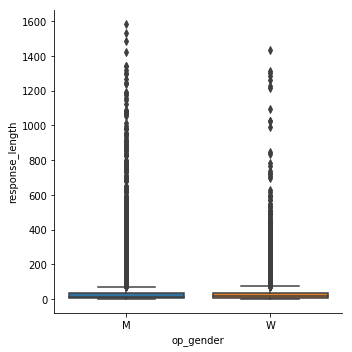

In [43]:
# plot the response length too
sns.catplot(x='op_gender', y='response_length', kind='box', data=fb_congress_sample)

print('average response length when poster is male:',
      fb_congress_sample[fb_congress_sample.op_gender == 'M'].response_length.mean())
print('average response length when poster is female:',
      fb_congress_sample[fb_congress_sample.op_gender == 'W'].response_length.mean())

This time, op_gender doesn't make much of a difference in the length of the responses.

In [44]:
# getting sentence lengths
post_sent_count = fb_congress_sample.post_text.map(lambda x: len(nltk.sent_tokenize(x)))
response_sent_count = fb_congress_sample.response_text.map(lambda x: len(nltk.sent_tokenize(x)))

In [45]:
# find average sentence length
post_avg_sent_length = fb_congress_sample.post_length / post_sent_count
response_avg_sent_length = fb_congress_sample.response_length / response_sent_count

In [46]:
# make new columns
fb_congress_sample['post_avg_slen'] = post_avg_sent_length
fb_congress_sample['response_avg_slen'] = response_avg_sent_length

fb_congress_sample.head()

,post_id,post_type,op_id,op_name,op_category,op_gender,responder_id,post_text,response_text,post_tokens,response_tokens,post_length,response_length,post_avg_slen,response_avg_slen
209,5,photo,57265377,Roger Williams,Congress_Republican,M,Ed,"After a phenomenal season, Jason Garrett has b...",great coach congrats,"[After, a, phenomenal, season, ,, Jason, Garre...","[great, coach, congrats]",18,3,18.000000,3.000000
647,19,video,57265377,Roger Williams,Congress_Republican,M,Michele,"Since its inception, Obamacare has been an abs...",I don't agree. Please stop using the language...,"[Since, its, inception, ,, Obamacare, has, bee...","[I, do, n't, agree, ., Please, stop, using, th...",28,181,9.333333,13.923077
1515,42,photo,57265377,Roger Williams,Congress_Republican,M,Ron,These are my foremost conservative principles....,Can't disagree on your list. I am waiting to s...,"[These, are, my, foremost, conservative, princ...","[Ca, n't, disagree, on, your, list, ., I, am, ...",11,26,5.500000,8.666667
1604,46,photo,57265377,Roger Williams,Congress_Republican,M,Dennis,"Today, I humbly ask for your vote. #ElectionDa...",No,"[Today, ,, I, humbly, ask, for, your, vote, .,...",[No],11,1,5.500000,1.000000
1956,55,photo,57265377,Roger Williams,Congress_Republican,M,Don,,N E V E R !!!!!!###!!!!!!##'!''',[],"[N, E, V, E, R, !, !, !, !, !, !, #, #, #, !, ...",0,26,NaN,26.000000


In [47]:
# does gender of poster have an impact on sentence length?
fb_congress_sample.groupby('op_gender')[['post_avg_slen','response_avg_slen']].describe()

post_avg_slen                                                        \
                  count       mean       std  min        25%   50%        75%   
op_gender                                                                       
M               35386.0  17.922192  8.877005  1.0  11.666667  17.0  23.000000   
W               12164.0  19.332858  8.252045  1.0  13.500000  18.5  24.333333   

                 response_avg_slen                                             \
             max             count       mean        std  min  25%  50%   75%   
op_gender                                                                       
M          266.0           37045.0  11.755903  11.391111  1.0  5.0  9.5  15.0   
W           86.0           12382.0  11.787006  10.620795  1.0  5.5  9.5  15.0   

                  
             max  
op_gender         
M          559.0  
W          330.0

It seems like female posters may use slightly longer sentences than male posters. Again, the length of the responses doesn't seem to change dependent on the gender of the poster.

Now, let's try calculating TTR:

In [92]:
# define TTR
def get_ttr(tokens):
    lower = [w.lower() for w in tokens]
    if len(lower) == 0:   # sometimes there was no text
        return None
    else:
        return len(set(lower))/len(lower)

In [93]:
# add to df
fb_congress_sample['post_TTR'] = fb_congress_sample.post_tokens.map(get_ttr)
fb_congress_sample['response_TTR'] = fb_congress_sample.response_tokens.map(get_ttr)
fb_congress_sample.head()

,post_id,post_type,op_id,op_name,op_category,op_gender,responder_id,post_text,response_text,post_tokens,response_tokens,post_length,response_length,post_avg_slen,response_avg_slen,post_TTR,response_TTR
209,5,photo,57265377,Roger Williams,Congress_Republican,M,Ed,"After a phenomenal season, Jason Garrett has b...",great coach congrats,"[After, a, phenomenal, season, ,, Jason, Garre...","[great, coach, congrats]",18,3,18.000000,3.000000,0.944444,1.000000
647,19,video,57265377,Roger Williams,Congress_Republican,M,Michele,"Since its inception, Obamacare has been an abs...",I don't agree. Please stop using the language...,"[Since, its, inception, ,, Obamacare, has, bee...","[I, do, n't, agree, ., Please, stop, using, th...",28,181,9.333333,13.923077,0.964286,0.552486
1515,42,photo,57265377,Roger Williams,Congress_Republican,M,Ron,These are my foremost conservative principles....,Can't disagree on your list. I am waiting to s...,"[These, are, my, foremost, conservative, princ...","[Ca, n't, disagree, on, your, list, ., I, am, ...",11,26,5.500000,8.666667,0.909091,0.961538
1604,46,photo,57265377,Roger Williams,Congress_Republican,M,Dennis,"Today, I humbly ask for your vote. #ElectionDa...",No,"[Today, ,, I, humbly, ask, for, your, vote, .,...",[No],11,1,5.500000,1.000000,1.000000,1.000000
1956,55,photo,57265377,Roger Williams,Congress_Republican,M,Don,,N E V E R !!!!!!###!!!!!!##'!''',[],"[N, E, V, E, R, !, !, !, !, !, !, #, #, #, !, ...",0,26,NaN,26.000000,NaN,0.307692


We need to somehow fix this. Is TTR even useful here? Sometimes the responses are so short that they have a TTR of 1. This doesn't help us.

### Facebook Wiki linguistic analysis

In [48]:
# how big is this one again?
fb_wiki_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10699137 entries, 0 to 10699136
Data columns (total 9 columns):
post_id          int64
post_type        object
op_id            int64
op_name          object
op_category      object
op_gender        object
responder_id     object
post_text        object
response_text    object
dtypes: int64(2), object(7)
memory usage: 816.3+ MB


In [49]:
# still too large for my analysis, let's reduce to 50,000 again
fb_wiki_sample = fb_wiki_df.sample(50000)
fb_wiki_sample.sort_index(inplace=True)

In [50]:
# tokenize...
fb_wiki_sample['post_tokens'] = fb_wiki_sample.post_text.map(nltk.word_tokenize)
fb_wiki_sample['response_tokens'] = fb_wiki_sample.response_text.map(nltk.word_tokenize)

# ... and find length
fb_wiki_sample['post_length'] = fb_wiki_sample.post_tokens.map(len)
fb_wiki_sample['response_length'] = fb_wiki_sample.response_tokens.map(len)

fb_wiki_sample.head()

,post_id,post_type,op_id,op_name,op_category,op_gender,responder_id,post_text,response_text,post_tokens,response_tokens,post_length,response_length
194,18,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Ashley,Here it comes . Strongest storms north . Be sa...,Kim Kuswik it's all above us,"[Here, it, comes, ., Strongest, storms, north,...","[Kim, Kuswik, it, 's, all, above, us]",11,7
752,80,video,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Dawn,Looking for showers,These were the thunderhead building before we ...,"[Looking, for, showers]","[These, were, the, thunderhead, building, befo...",3,23
790,82,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Alec,"Hello it's Baseball time! Uh, but there's a ch...",Sorry to say but that's an old picture of the ...,"[Hello, it, 's, Baseball, time, !, Uh, ,, but,...","[Sorry, to, say, but, that, 's, an, old, pictu...",69,37
796,82,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Xenia,"Hello it's Baseball time! Uh, but there's a ch...",😳,"[Hello, it, 's, Baseball, time, !, Uh, ,, but,...",[😳],69,1
798,82,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Yelena,"Hello it's Baseball time! Uh, but there's a ch...",Lidiya Gur,"[Hello, it, 's, Baseball, time, !, Uh, ,, but,...","[Lidiya, Gur]",69,2


average post length when poster is male: 37.62070204864023
average post length when poster is female: 28.37990151924578


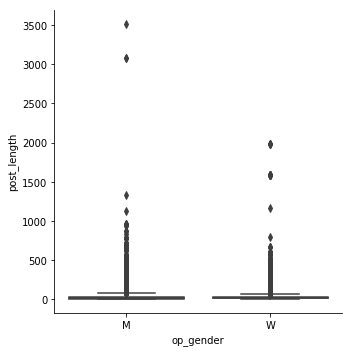

In [51]:
sns.catplot(x='op_gender', y='post_length', kind='box', data=fb_wiki_sample)

print('average post length when poster is male:',
      fb_wiki_sample[fb_wiki_sample.op_gender == 'M'].post_length.mean())
print('average post length when poster is female:',
      fb_wiki_sample[fb_wiki_sample.op_gender == 'W'].post_length.mean())

Interestingly, this is opposite from the Facebook Congress data. This time, the male posters have longer posts. It could also be specific to the sample - I'll have to make sure different samples are consistent to these results.

average response length when poster is male: 14.710315083263447
average response length when poster is female: 13.589653515883024


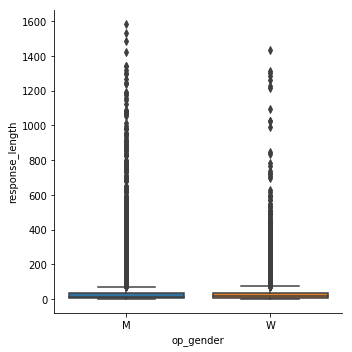

In [52]:
# look at response length again
sns.catplot(x='op_gender', y='response_length', kind='box', data=fb_congress_sample)

print('average response length when poster is male:',
      fb_wiki_sample[fb_wiki_sample.op_gender == 'M'].response_length.mean())
print('average response length when poster is female:',
      fb_wiki_sample[fb_wiki_sample.op_gender == 'W'].response_length.mean())

Again, not a large difference in response length when responding to male vs. female posters.

In [53]:
# summary of post and response length
fb_wiki_sample.groupby('op_gender')[['post_length','response_length']].describe()

post_length                                                      \
                count       mean        std  min  25%   50%   75%     max   
op_gender                                                                   
M             16694.0  37.620702  82.379404  0.0  6.0  16.0  33.0  3520.0   
W             33306.0  28.379902  51.823085  0.0  8.0  20.0  32.0  1978.0   

          response_length                                                     
                    count       mean        std  min  25%  50%   75%     max  
op_gender                                                                     
M                 16694.0  14.710315  32.203515  0.0  3.0  7.0  15.0  1225.0  
W                 33306.0  13.589654  31.622657  0.0  3.0  6.0  13.0  1394.0

In [54]:
# getting sentence lengths
post_sent_count = fb_wiki_sample.post_text.map(lambda x: len(nltk.sent_tokenize(x)))
response_sent_count = fb_wiki_sample.response_text.map(lambda x: len(nltk.sent_tokenize(x)))

In [55]:
# find average sentence length
post_avg_sent_length = fb_wiki_sample.post_length / post_sent_count
response_avg_sent_length = fb_wiki_sample.response_length / response_sent_count

In [56]:
# make new columns
fb_wiki_sample['post_avg_slen'] = post_avg_sent_length
fb_wiki_sample['response_avg_slen'] = response_avg_sent_length

fb_wiki_sample.head()

,post_id,post_type,op_id,op_name,op_category,op_gender,responder_id,post_text,response_text,post_tokens,response_tokens,post_length,response_length,post_avg_slen,response_avg_slen
194,18,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Ashley,Here it comes . Strongest storms north . Be sa...,Kim Kuswik it's all above us,"[Here, it, comes, ., Strongest, storms, north,...","[Kim, Kuswik, it, 's, all, above, us]",11,7,3.666667,7.000000
752,80,video,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Dawn,Looking for showers,These were the thunderhead building before we ...,"[Looking, for, showers]","[These, were, the, thunderhead, building, befo...",3,23,3.000000,7.666667
790,82,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Alec,"Hello it's Baseball time! Uh, but there's a ch...",Sorry to say but that's an old picture of the ...,"[Hello, it, 's, Baseball, time, !, Uh, ,, but,...","[Sorry, to, say, but, that, 's, an, old, pictu...",69,37,9.857143,18.500000
796,82,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Xenia,"Hello it's Baseball time! Uh, but there's a ch...",😳,"[Hello, it, 's, Baseball, time, !, Uh, ,, but,...",[😳],69,1,9.857143,1.000000
798,82,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Yelena,"Hello it's Baseball time! Uh, but there's a ch...",Lidiya Gur,"[Hello, it, 's, Baseball, time, !, Uh, ,, but,...","[Lidiya, Gur]",69,2,9.857143,2.000000


In [57]:
# does gender of poster have an impact on sentence length?
fb_wiki_sample.groupby('op_gender')[['post_avg_slen','response_avg_slen']].describe()

post_avg_slen                                                  \
                  count       mean       std  min  25%   50%        75%   
op_gender                                                                 
M               15020.0  11.631602  8.996545  1.0  6.0  9.50  15.400000   
W               29519.0  10.941769  8.156324  1.0  7.0  9.75  13.615385   

                 response_avg_slen                                      \
             max             count      mean        std  min  25%  50%   
op_gender                                                                
M          344.0           16638.0  7.440170   7.943145  1.0  3.0  5.0   
W          527.0           33233.0  7.252157  11.345835  1.0  2.5  5.0   

                            
                75%    max  
op_gender                   
M          9.285714  198.0  
W          9.000000  708.0

This time, sentence length looks about equal in male vs. female posts, and well as in responses to male vs. female posters.

### Fitocracy linguistic analysis

In [58]:
# how big is this?
fitocracy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318535 entries, 0 to 318534
Data columns (total 7 columns):
post_id             318535 non-null int64
op_id               318535 non-null int64
op_gender           318535 non-null object
responder_id        318535 non-null int64
responder_gender    318535 non-null object
post_text           318535 non-null object
response_text       318535 non-null object
dtypes: int64(3), object(4)
memory usage: 19.4+ MB


In [59]:
# again reduce to 50,000
fitocracy_sample = fitocracy_df.sample(50000)
fitocracy_sample.sort_index(inplace=True)

fitocracy_sample.head()

,post_id,op_id,op_gender,responder_id,responder_gender,post_text,response_text
3,3,117,M,8520,W,dam gurl lookin mad tone in dat pp holla bb,"Mirin 3% bodyfat? Yeah, you are."
9,9,117,M,29126,M,"I just ate a chicken, got a half pound of gree...",props for advanced chicken portioning strategy
25,25,117,M,26833,M,"> in the rack, doin ma squatz> trainer working...",Everyone has more interesting gym adventures t...
26,26,117,M,127640,W,Jesus fuck I love deadlifting.,YEEEEAAAHH
39,39,117,M,826,M,> tfw you're more excited about the fruit sala...,I thought this was every Friday night in NH...


So now we have both op gender and responder gender. I want to figure out how to put all of this in a box plot together for easier visualization... look into this. For now, moving on.

In [60]:
# tokenize...
fitocracy_sample['post_tokens'] = fitocracy_sample.post_text.map(nltk.word_tokenize)
fitocracy_sample['response_tokens'] = fitocracy_sample.response_text.map(nltk.word_tokenize)

# ... and find length
fitocracy_sample['post_length'] = fitocracy_sample.post_tokens.map(len)
fitocracy_sample['response_length'] = fitocracy_sample.response_tokens.map(len)

fitocracy_sample.head()

,post_id,op_id,op_gender,responder_id,responder_gender,post_text,response_text,post_tokens,response_tokens,post_length,response_length
3,3,117,M,8520,W,dam gurl lookin mad tone in dat pp holla bb,"Mirin 3% bodyfat? Yeah, you are.","[dam, gurl, lookin, mad, tone, in, dat, pp, ho...","[Mirin, 3, %, bodyfat, ?, Yeah, ,, you, are, .]",10,10
9,9,117,M,29126,M,"I just ate a chicken, got a half pound of gree...",props for advanced chicken portioning strategy,"[I, just, ate, a, chicken, ,, got, a, half, po...","[props, for, advanced, chicken, portioning, st...",54,6
25,25,117,M,26833,M,"> in the rack, doin ma squatz> trainer working...",Everyone has more interesting gym adventures t...,"[>, in, the, rack, ,, doin, ma, squatz, >, tra...","[Everyone, has, more, interesting, gym, advent...",101,11
26,26,117,M,127640,W,Jesus fuck I love deadlifting.,YEEEEAAAHH,"[Jesus, fuck, I, love, deadlifting, .]",[YEEEEAAAHH],6,1
39,39,117,M,826,M,> tfw you're more excited about the fruit sala...,I thought this was every Friday night in NH...,"[>, tfw, you, 're, more, excited, about, the, ...","[I, thought, this, was, every, Friday, night, ...",46,10


In [61]:
fitocracy_sample.groupby('op_gender')['post_length', 'response_length'].describe()

post_length                                                      \
                count       mean        std  min  25%   50%   75%     max   
op_gender                                                                   
M             27317.0  16.841600  17.357325  1.0  7.0  10.0  20.0   355.0   
W             22683.0  18.723537  23.324799  1.0  8.0  11.0  22.0  1899.0   

          response_length                                                     
                    count       mean        std  min  25%   50%   75%    max  
op_gender                                                                     
M                 27317.0  24.860746  29.028439  1.0  6.0  12.0  29.0  348.0  
W                 22683.0  27.478640  30.898837  1.0  6.0  13.0  35.0  315.0

In [62]:
fitocracy_sample.groupby(['op_gender', 'responder_gender'])['response_length'].describe()

count       mean        std  min  25%   50%  \
op_gender responder_gender                                                  
M         M                 12295.0  16.860919  19.093266  1.0  5.0  10.0   
          W                 15022.0  31.408334  33.745376  1.0  6.0  14.0   
W         M                 11865.0  15.412558  16.927530  1.0  5.0  10.0   
          W                 10818.0  40.712516  36.781136  1.0  8.0  22.0   

                             75%    max  
op_gender responder_gender               
M         M                 21.0  291.0  
          W                 58.0  348.0  
W         M                 19.0  288.0  
          W                 86.0  315.0

A lot to analyze here. Let's break this up a little:

#### Post length

Posts by females seem to be a little longer than posts by males.

#### Response length

Overall, responses to female posters seem to be a little longer than responses to male posters. Let's break it down even further:
- Male poster/male responder has shorter responses than male poster/female responder.
- Female poster/male responder has shorter responses than female poster/female responder.

So do female responders always have longer responses than male responders, regardless of the original poster's gender? It seems like it from this quick analysis.

Given this information about post and response length by gender, it seems like (for Fitocracy, at least) female posters and responders generally have longer posts/responses than their male counterparts.

#### Gender x Gender
Male responders have about the same length response when responding to male vs. female posters, but female responders have longer responses when responding to female than when responding to male.

In [63]:
# getting sentence lengths
post_sent_count = fitocracy_sample.post_text.map(lambda x: len(nltk.sent_tokenize(x)))
response_sent_count = fitocracy_sample.response_text.map(lambda x: len(nltk.sent_tokenize(x)))

In [64]:
# find average sentence length
post_avg_sent_length = fitocracy_sample.post_length / post_sent_count
response_avg_sent_length = fitocracy_sample.response_length / response_sent_count

In [65]:
# make new columns
fitocracy_sample['post_avg_slen'] = post_avg_sent_length
fitocracy_sample['response_avg_slen'] = response_avg_sent_length

fitocracy_sample.head()

,post_id,op_id,op_gender,responder_id,responder_gender,post_text,response_text,post_tokens,response_tokens,post_length,response_length,post_avg_slen,response_avg_slen
3,3,117,M,8520,W,dam gurl lookin mad tone in dat pp holla bb,"Mirin 3% bodyfat? Yeah, you are.","[dam, gurl, lookin, mad, tone, in, dat, pp, ho...","[Mirin, 3, %, bodyfat, ?, Yeah, ,, you, are, .]",10,10,10.0,5.0
9,9,117,M,29126,M,"I just ate a chicken, got a half pound of gree...",props for advanced chicken portioning strategy,"[I, just, ate, a, chicken, ,, got, a, half, po...","[props, for, advanced, chicken, portioning, st...",54,6,27.0,6.0
25,25,117,M,26833,M,"> in the rack, doin ma squatz> trainer working...",Everyone has more interesting gym adventures t...,"[>, in, the, rack, ,, doin, ma, squatz, >, tra...","[Everyone, has, more, interesting, gym, advent...",101,11,50.5,5.5
26,26,117,M,127640,W,Jesus fuck I love deadlifting.,YEEEEAAAHH,"[Jesus, fuck, I, love, deadlifting, .]",[YEEEEAAAHH],6,1,6.0,1.0
39,39,117,M,826,M,> tfw you're more excited about the fruit sala...,I thought this was every Friday night in NH...,"[>, tfw, you, 're, more, excited, about, the, ...","[I, thought, this, was, every, Friday, night, ...",46,10,46.0,10.0


In [66]:
# summarize again
fitocracy_sample.groupby('op_gender')['post_avg_slen', 'response_avg_slen'].describe()

post_avg_slen                                                       \
                  count      mean       std  min  25%  50%        75%    max   
op_gender                                                                      
M               27317.0  9.208115  6.388084  1.0  5.0  8.0  10.500000  111.0   
W               22683.0  9.329632  8.847293  1.0  5.5  8.0  10.333333  949.5   

          response_avg_slen                                                   
                      count       mean       std  min  25%  50%   75%    max  
op_gender                                                                     
M                   27317.0  10.050945  8.626380  1.0  4.0  7.0  12.5  102.0  
W                   22683.0  10.575439  9.352544  1.0  4.0  7.2  12.5  107.0

In [67]:
fitocracy_sample.groupby(['op_gender', 'responder_gender'])['response_avg_slen'].describe()

count       mean        std  min  25%  \
op_gender responder_gender                                            
M         M                 12295.0   8.426625   6.585605  1.0  4.0   
          W                 15022.0  11.380397   9.792882  1.0  4.0   
W         M                 11865.0   7.850384   6.179140  1.0  4.0   
          W                 10818.0  13.564233  11.156079  1.0  5.0   

                                  50%        75%    max  
op_gender responder_gender                               
M         M                  6.666667  11.000000  102.0  
          W                  7.333333  15.000000   85.0  
W         M                  6.000000  10.000000   89.0  
          W                 10.000000  23.666667  107.0

Analyzing sentence length by gender:

#### Post sentence length

Posts by females and males seem to have about the same average sentence length.

#### Response sentence length

Responses to females vs. males seem to have about the same average sentence length, but let's again break it down further:
- Male poster/male responder has shorter sentences in the response than male poster/female responder.
- Female poster/male responder has shorter sentences in the response than female poster/female responder.

Summing that up, it seems like female responders use longer sentences regardless of the original poster's gender.

#### Gender x Gender
Male responders have a little bit longer sentences when responding to a male than when responding to a female, and female responders have a little bit longer sentences when responding to a female than when responding to a male.

### Reddit linguistic analysis

In [68]:
# how big is this?
reddit_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1453512 entries, 0 to 1453511
Data columns (total 10 columns):
post_id                     1453512 non-null int64
subreddit                   1453512 non-null object
op_id                       1453512 non-null object
op_gender                   1453512 non-null object
op_gender_visible           1453512 non-null bool
responder_id                1453512 non-null object
responder_gender            1453512 non-null object
responder_gender_visible    1453512 non-null object
post_text                   1453512 non-null object
response_text               1453512 non-null object
dtypes: bool(1), int64(1), object(8)
memory usage: 112.3+ MB


In [69]:
# reduce to 50,000 again
reddit_sample = reddit_df.sample(50000)
reddit_sample.sort_index(inplace=True)

reddit_sample.head()

,post_id,subreddit,op_id,op_gender,op_gender_visible,responder_id,responder_gender,responder_gender_visible,post_text,response_text
47,47,2007scape,Kastoli,M,False,Valimuraj,,unknown_gender,92-99 is half of the exp required for a 99 btw...,Nah. He has gotten 90 levels. 90/10 = 9. 9 lev...
56,56,2007scape,SmellySlutSocket,M,False,KarlTheCool,,unknown_gender,"As a non-member who has never fletched before,...",Fletching has a knack for turning incredibly c...
84,84,2007scape,SmellySlutSocket,M,False,killers455,,unknown_gender,You act as if /r/2007scape is a truly amazing ...,"No, hes trying to trick retarded 13 year olds ..."
113,113,2007scape,Lykan__,M,False,Ooopalo,,unknown_gender,Fuck Jagex. I know this is how they are thinki...,Just unsub now
117,117,2007scape,SlayerMaster,M,False,GusGrimly,,unknown_gender,Make it a quest reward item that costs money t...,Making it a quest reward means a whole new que...


In [70]:
# tokenize...
reddit_sample['post_tokens'] = reddit_sample.post_text.map(nltk.word_tokenize)
reddit_sample['response_tokens'] = reddit_sample.response_text.map(nltk.word_tokenize)

# ... and find length
reddit_sample['post_length'] = reddit_sample.post_tokens.map(len)
reddit_sample['response_length'] = reddit_sample.response_tokens.map(len)

reddit_sample.head()

,post_id,subreddit,op_id,op_gender,op_gender_visible,responder_id,responder_gender,responder_gender_visible,post_text,response_text,post_tokens,response_tokens,post_length,response_length
47,47,2007scape,Kastoli,M,False,Valimuraj,,unknown_gender,92-99 is half of the exp required for a 99 btw...,Nah. He has gotten 90 levels. 90/10 = 9. 9 lev...,"[92-99, is, half, of, the, exp, required, for,...","[Nah, ., He, has, gotten, 90, levels, ., 90/10...",12,26
56,56,2007scape,SmellySlutSocket,M,False,KarlTheCool,,unknown_gender,"As a non-member who has never fletched before,...",Fletching has a knack for turning incredibly c...,"[As, a, non-member, who, has, never, fletched,...","[Fletching, has, a, knack, for, turning, incre...",16,49
84,84,2007scape,SmellySlutSocket,M,False,killers455,,unknown_gender,You act as if /r/2007scape is a truly amazing ...,"No, hes trying to trick retarded 13 year olds ...","[You, act, as, if, /r/2007scape, is, a, truly,...","[No, ,, hes, trying, to, trick, retarded, 13, ...",59,100
113,113,2007scape,Lykan__,M,False,Ooopalo,,unknown_gender,Fuck Jagex. I know this is how they are thinki...,Just unsub now,"[Fuck, Jagex, ., I, know, this, is, how, they,...","[Just, unsub, now]",92,3
117,117,2007scape,SlayerMaster,M,False,GusGrimly,,unknown_gender,Make it a quest reward item that costs money t...,Making it a quest reward means a whole new que...,"[Make, it, a, quest, reward, item, that, costs...","[Making, it, a, quest, reward, means, a, whole...",12,54


average post length when poster is male: 39.173227550659455
average post length when poster is female: 47.823642295144886


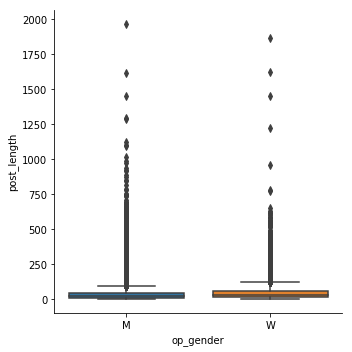

In [71]:
sns.catplot(x='op_gender', y='post_length', kind='box', data=reddit_sample)

print('average post length when poster is male:',
      reddit_sample[reddit_sample.op_gender == 'M'].post_length.mean())
print('average post length when poster is female:',
      reddit_sample[reddit_sample.op_gender == 'W'].post_length.mean())

So female posters typically have longer posts than male posters.

average response length when poster is male: 33.58676537470312
average response length when poster is female: 37.001055459604686


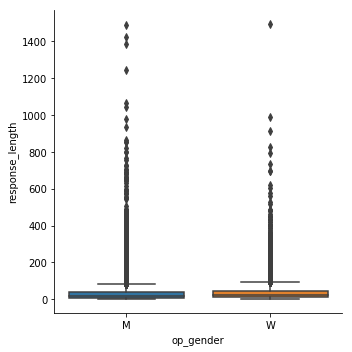

In [72]:
sns.catplot(x='op_gender', y='response_length', kind='box', data=reddit_sample)

print('average response length when poster is male:',
      reddit_sample[reddit_sample.op_gender == 'M'].response_length.mean())
print('average response length when poster is female:',
      reddit_sample[reddit_sample.op_gender == 'W'].response_length.mean())

Responses to female posters are a little bit longer than responses to male posters, but they are very close.

In [73]:
# summarize
reddit_sample.groupby('op_gender')['post_length', 'response_length'].describe()

post_length                                                       \
                count       mean        std  min   25%   50%   75%     max   
op_gender                                                                    
M             39578.0  39.173228  59.552740  1.0  11.0  22.0  44.0  1968.0   
W             10422.0  47.823642  69.465894  1.0  13.0  27.0  56.0  1869.0   

          response_length                                                       
                    count       mean        std  min   25%   50%   75%     max  
op_gender                                                                       
M                 39578.0  33.586765  50.790282  1.0   9.0  18.0  39.0  1487.0  
W                 10422.0  37.001055  54.100119  1.0  10.0  21.0  43.0  1495.0

In [74]:
reddit_sample.groupby(['op_gender', 'responder_gender'])['response_length'].describe()

count       mean        std  min   25%   50%  \
op_gender responder_gender                                                   
M                           36080.0  33.328021  50.604814  1.0   9.0  18.0   
          M                  2700.0  35.274815  52.454049  1.0  10.0  20.0   
          W                   798.0  39.573935  52.982504  1.0  11.0  23.5   
W                            9471.0  36.306620  51.903417  1.0  10.0  21.0   
          M                   703.0  43.709815  78.737354  1.0  12.0  24.0   
          W                   248.0  44.504032  48.720802  2.0  14.0  30.5   

                             75%     max  
op_gender responder_gender                
M                           39.0  1487.0  
          M                 41.0  1041.0  
          W                 47.0   641.0  
W                           42.0   989.0  
          M                 47.5  1495.0  
          W                 57.0   325.0

For now, we don't care about when responder gender isn't visible. Let's summarize:

#### Post length

Female posters seem to typically have longer posts than male posters.

#### Response length

Responses to female posters seem to be a little longer than responses to male posters. Let's dive a little deeper:

- Male poster/male responder has shorter response length than male poster/male responder.
- female poster/male responder has shorter response length than female poster/female responder.

Again, it seems that female responders typically have longer responses than male responders, regardless of the original poster's gender.

#### Gender x Gender

Interestingly, male responders have longer responses when responding to females than when responding to males. Female responders have longer responses when responding to females than when responding to males.

In [75]:
# getting sentence lengths
post_sent_count = reddit_sample.post_text.map(lambda x: len(nltk.sent_tokenize(x)))
response_sent_count = reddit_sample.response_text.map(lambda x: len(nltk.sent_tokenize(x)))

In [76]:
# find average sentence length
post_avg_sent_length = reddit_sample.post_length / post_sent_count
response_avg_sent_length = reddit_sample.response_length / response_sent_count

In [77]:
# make new columns
reddit_sample['post_avg_slen'] = post_avg_sent_length
reddit_sample['response_avg_slen'] = response_avg_sent_length

reddit_sample.head()

,post_id,subreddit,op_id,op_gender,op_gender_visible,responder_id,responder_gender,responder_gender_visible,post_text,response_text,post_tokens,response_tokens,post_length,response_length,post_avg_slen,response_avg_slen
47,47,2007scape,Kastoli,M,False,Valimuraj,,unknown_gender,92-99 is half of the exp required for a 99 btw...,Nah. He has gotten 90 levels. 90/10 = 9. 9 lev...,"[92-99, is, half, of, the, exp, required, for,...","[Nah, ., He, has, gotten, 90, levels, ., 90/10...",12,26,12.000000,4.333333
56,56,2007scape,SmellySlutSocket,M,False,KarlTheCool,,unknown_gender,"As a non-member who has never fletched before,...",Fletching has a knack for turning incredibly c...,"[As, a, non-member, who, has, never, fletched,...","[Fletching, has, a, knack, for, turning, incre...",16,49,16.000000,24.500000
84,84,2007scape,SmellySlutSocket,M,False,killers455,,unknown_gender,You act as if /r/2007scape is a truly amazing ...,"No, hes trying to trick retarded 13 year olds ...","[You, act, as, if, /r/2007scape, is, a, truly,...","[No, ,, hes, trying, to, trick, retarded, 13, ...",59,100,19.666667,100.000000
113,113,2007scape,Lykan__,M,False,Ooopalo,,unknown_gender,Fuck Jagex. I know this is how they are thinki...,Just unsub now,"[Fuck, Jagex, ., I, know, this, is, how, they,...","[Just, unsub, now]",92,3,15.333333,3.000000
117,117,2007scape,SlayerMaster,M,False,GusGrimly,,unknown_gender,Make it a quest reward item that costs money t...,Making it a quest reward means a whole new que...,"[Make, it, a, quest, reward, item, that, costs...","[Making, it, a, quest, reward, means, a, whole...",12,54,12.000000,18.000000


In [78]:
# what did we find?
reddit_sample.groupby('op_gender')['post_avg_slen', 'response_avg_slen'].describe()

post_avg_slen                                                  \
                  count       mean       std  min  25%   50%        75%   
op_gender                                                                 
M               39578.0  13.487779  8.744261  1.0  8.0  12.0  17.333333   
W               10422.0  14.094440  8.899027  1.0  8.0  12.8  18.000000   

                 response_avg_slen                                             \
             max             count       mean       std  min  25%   50%   75%   
op_gender                                                                       
M          333.0           39578.0  12.758458  8.648946  1.0  7.0  11.0  17.0   
W          228.0           10422.0  12.898965  8.648593  1.0  7.0  11.5  17.0   

                  
             max  
op_gender         
M          151.0  
W          226.0

In [79]:
reddit_sample.groupby(['op_gender', 'responder_gender'])['response_avg_slen'].describe()

count       mean       std  min  25%        50%  \
op_gender responder_gender                                                      
M                           36080.0  12.747367  8.714677  1.0  7.0  11.000000   
          M                  2700.0  12.941258  8.063078  1.0  7.0  11.666667   
          W                   798.0  12.641439  7.506654  1.0  7.0  11.500000   
W                            9471.0  12.820632  8.745236  1.0  7.0  11.250000   
          M                   703.0  13.686102  7.807876  1.0  8.0  12.666667   
          W                   248.0  13.659195  6.906246  2.0  9.0  12.828571   

                                  75%    max  
op_gender responder_gender                    
M                           17.000000  151.0  
          M                 17.000000   86.0  
          W                 16.666667   56.0  
W                           17.000000  226.0  
          M                 18.000000   59.0  
          W                 17.625000   34.0

What can we figure out from this?

#### Post sentence length

The average sentence length for both female and male posters is about the same.

#### Response sentence length

The average response length responding to both female and male posters is about the same. Also, the gender of the responder doesn't seem to make a difference in average sentence length in any case.

### TED linguistic analysis

In [80]:
# how big is this?
ted_responses_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190347 entries, 0 to 190413
Data columns (total 5 columns):
post_id          190347 non-null int64
op_id            190347 non-null object
op_gender        190347 non-null object
responder_id     190347 non-null object
response_text    190347 non-null object
dtypes: int64(1), object(4)
memory usage: 8.7+ MB


In [81]:
# reduce again for consistency (though I think this would be possible to handle anyways)
ted_sample = ted_responses_df.sample(50000)
ted_sample.sort_index(inplace=True)

In [82]:
# tokenize...
ted_sample['response_tokens'] = ted_sample.response_text.map(nltk.word_tokenize)

# ... and find length
ted_sample['response_length'] = ted_sample.response_tokens.map(len)

ted_sample.head()

,post_id,op_id,op_gender,responder_id,response_text,response_tokens,response_length
2,2,Aimee Mullins,W,Tanya,I love that she took away some of the mystery ...,"[I, love, that, she, took, away, some, of, the...",19
7,7,Aimee Mullins,W,Jim,I was in the audience in 1998 when Aimee made ...,"[I, was, in, the, audience, in, 1998, when, Ai...",93
11,11,Aimee Mullins,W,M-L,"Aimee is an extroadinary example of how a ""han...","[Aimee, is, an, extroadinary, example, of, how...",25
16,16,Aimee Mullins,W,David,I'd never heard of Aimee Mullins when she spok...,"[I, 'd, never, heard, of, Aimee, Mullins, when...",66
20,20,Aimee Mullins,W,NICOLAS,"They mention the doctor who designed the legs,...","[They, mention, the, doctor, who, designed, th...",20


average response length when poster is male: 94.54055197208417
average response length when poster is female: 91.6986526454157


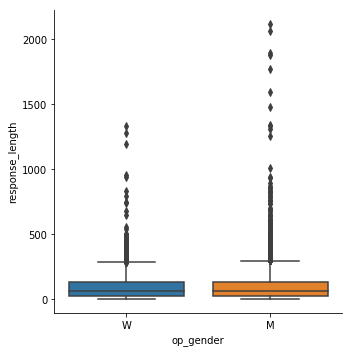

In [83]:
sns.catplot(x='op_gender', y='response_length', kind='box', data=ted_sample)

print('average response length when poster is male:',
      ted_sample[ted_sample.op_gender == 'M'].response_length.mean())
print('average response length when poster is female:',
      ted_sample[ted_sample.op_gender == 'W'].response_length.mean())

It seems responses are longer when the speaker is male than when they are female. Let's look at some more detail:

In [84]:
ted_sample.groupby('op_gender')['response_length'].describe()

,count,mean,std,min,25%,50%,75%,max
op_gender,,,,,,,,
M,37828.0,94.540552,98.622197,1.0,25.0,61.0,134.0,2116.0
W,12172.0,91.698653,93.811036,1.0,24.0,60.0,129.0,1331.0


In [85]:
# getting sentence lengths
response_sent_count = ted_sample.response_text.map(lambda x: len(nltk.sent_tokenize(x)))

In [86]:
# find average sentence length
response_avg_sent_length = ted_sample.response_length / response_sent_count

In [87]:
# make new column
ted_sample['response_avg_slen'] = response_avg_sent_length

ted_sample.head()

,post_id,op_id,op_gender,responder_id,response_text,response_tokens,response_length,response_avg_slen
2,2,Aimee Mullins,W,Tanya,I love that she took away some of the mystery ...,"[I, love, that, she, took, away, some, of, the...",19,19.000000
7,7,Aimee Mullins,W,Jim,I was in the audience in 1998 when Aimee made ...,"[I, was, in, the, audience, in, 1998, when, Ai...",93,13.285714
11,11,Aimee Mullins,W,M-L,"Aimee is an extroadinary example of how a ""han...","[Aimee, is, an, extroadinary, example, of, how...",25,12.500000
16,16,Aimee Mullins,W,David,I'd never heard of Aimee Mullins when she spok...,"[I, 'd, never, heard, of, Aimee, Mullins, when...",66,13.200000
20,20,Aimee Mullins,W,NICOLAS,"They mention the doctor who designed the legs,...","[They, mention, the, doctor, who, designed, th...",20,10.000000


In [88]:
# summarize
ted_sample.groupby('op_gender')['response_avg_slen'].describe()

,count,mean,std,min,25%,50%,75%,max
op_gender,,,,,,,,
M,37828.0,18.528266,14.323422,1.0,11.269369,17.000000,22.938419,1309.0
W,12172.0,18.095261,12.363067,1.0,11.000000,16.444444,22.500000,333.0


Sentence length seems to be about the same whether they are responding to a male vs. a female speaker.